<a href="https://www.kaggle.com/code/ayushs9020/understanding-the-competition-s3e19?scriptVersionId=136383369" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Forecasting Mini-Course Sales 💰

<IMG SRC = "https://i0.wp.com/laughbreak.com/wp-content/uploads/2019/09/Banana-Ducks.jpg?fit=855%2C1024&ssl=1" WIDTH = 400>
    
**I could not downalod the actual image from playground series, so I am using the banana Duck, hope you will not mind**
    
$Kaggle$ $Mini-Courses$ are `free`/`self-paced` courses that `teach` you the `essential skills` for `Data Science`/`Machine Learning`. They are designed to be `accessible to beginners`, but they also offer `challenges`/`exercises` that will help you grow your skills. Each mini-course is divided into `several modules`, each of which covers a `specific topic`. The modules are typically `short`/`easy` to follow, and they include `interactive exercises` that allow you to practice what you've learned. At the `end` of each mini-course, you will be able to complete a `project` that demonstrates your mastery of the material. These projects are a great way to `showcase the skills` to potential employers or clients.

It becomes very `important`/`profitable` both with `time`/`resources` for the `Kaggle Team` to `predict the Sales` of a `particular course` `before` its `launch` and `major development` which helps them in various after tasks such as 

* **Optimize Marketing Campaigns** - By knowing `how many people` are `likely` to `purchase a mini-course`. Kaggle can allocate its `marketing budget` more `effectively`. For example, if a `mini-course` is `expected to be very popular`, Kaggle can `invest more in advertising` it. Conversely, if a `mini-course` is `not expected to be very popular`, Kaggle can `save money by investing less` in advertising it.
* **Pricing** - Knowing `how many people` are `likely to purchase` a mini-course can help Kaggle `set a price` that is `both profitable and attractive` to buyers. For example, if a `mini-course is expected to be very popular`, Kaggle can `charge a higher price for it`. Conversely, if a `mini-course is not expected to be very popular`, Kaggle can `charge a lower price for it`.
* **Improve Course Experience**. By knowing `how many people` are `likely to purchase a mini-course`, Kaggle can `make sure` that the `mini-course` is `meeting the needs` of its users. For example, if a `mini-course is not attracting` as many buyers as expected, Kaggle can `review the content of the mini-course` to see if it can be improved.
* **New Opportunities** - By predicting Kaggle Mini-Course sales, Kaggle can `identify new opportunities` for growth. For example, if a `mini-course` is `unexpectedly popular`, Kaggle can consider `creating more` mini-courses on `similar topics`.

# 1 | Advisory 💡
    
The data have a lot of Categorical columns, which will result in Sparse Matrix

# 2 | Data 📊

In [1]:
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e19/sample_submission.csv
/kaggle/input/playground-series-s3e19/train.csv
/kaggle/input/playground-series-s3e19/test.csv


Now lets dive into the data

In [2]:
data = pd.read_csv("/kaggle/input/playground-series-s3e19/train.csv")
data

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


This is our `Training Data` containing $1,36,950$ `Rows` and $6$ columns, accounting to a total of $8,21,700$ values. This huge amount of data will help in the dense modelinng 

In [3]:
sample_test = pd.read_csv("/kaggle/input/playground-series-s3e19/test.csv")
sample_test

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better
...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions


This is our `Training Data` containing $27,375$ `Rows` and $5$ columns, accounting to a total of $1,36,875$ values

# 4 | Data Visualization 🔬

In [4]:
import numpy as np

import matplotlib.pyplot as plt 

Now lets see how our data actually looks like 

Text(0.5, 1.0, 'Country Distribution')

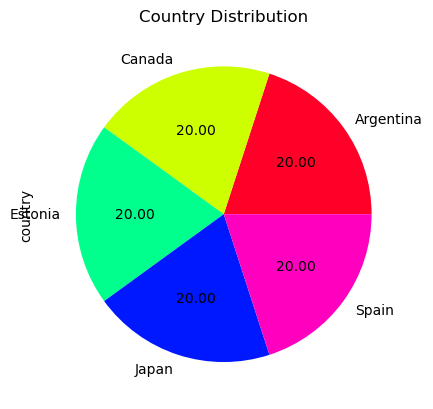

In [5]:
data["country"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")
plt.title("Country Distribution")

Frankly speaking this is one of the perfect generated Distributions I have ever seen 

Text(0.5, 1.0, 'Store Distribution')

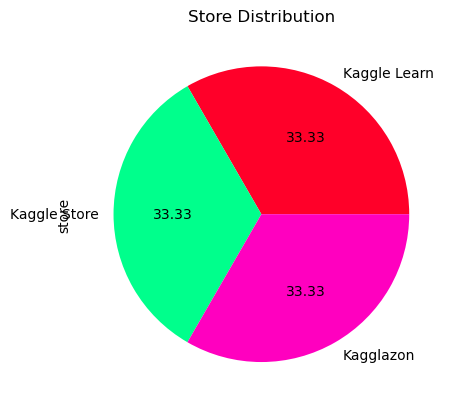

In [6]:
data["store"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")
plt.title("Store Distribution")

Text(0.5, 1.0, 'Product Distribution')

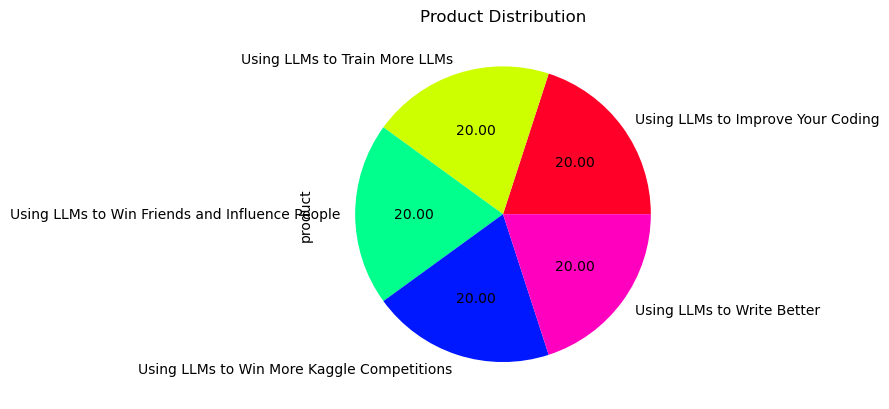

In [7]:
data["product"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")
plt.title("Product Distribution")

Text(0.5, 1.0, 'Distribution by Month')

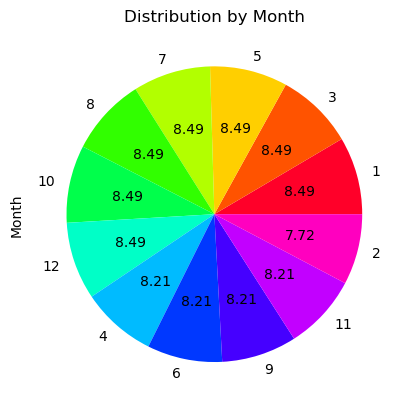

In [8]:
data["Month"] = pd.DataFrame(np.array([x for x in pd.DatetimeIndex(pd.to_datetime(data["date"])).month]))

data["Month"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

plt.title("Distribution by Month")

Text(0.5, 1.0, 'Distribution by Year')

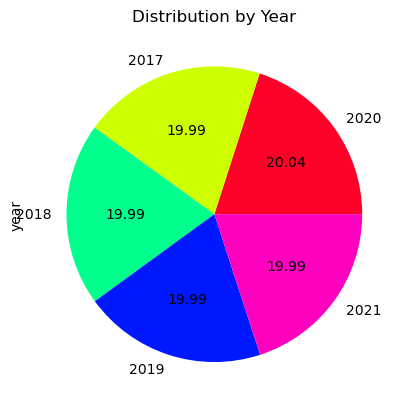

In [9]:
data["year"] = pd.DataFrame(np.array([x for x in pd.DatetimeIndex(pd.to_datetime(data["date"])).year]))

data["year"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

plt.title("Distribution by Year")

Text(0.5, 1.0, 'Distribution by Day')

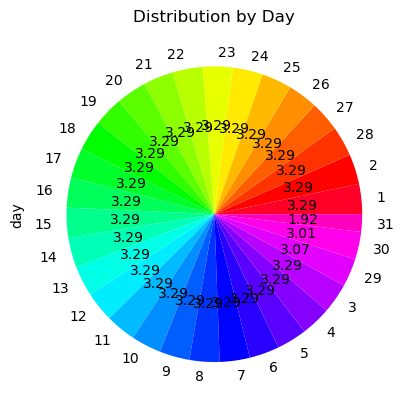

In [10]:
data["day"] = pd.DataFrame(np.array([x for x in pd.DatetimeIndex(pd.to_datetime(data["date"])).day]))

data["day"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

plt.title("Distribution by Day")

# 4 | Data Preprocessing ✂️

Lets first remove the `ID` column as it is like a `Primary Key` for the data

In [11]:
import numpy as np 

In [12]:
data.drop(["id" , "date"] , axis = 1 , inplace = True)

The data has many of the categorical columns, which we cant feed into a mathematical model. So we first need to convert these values into numbers somehow. For this we use `pd.get_dummies()`

This is how our data after preprocessing looks like 

In [13]:
pd.get_dummies(data[["country" , "store" , "product"]] , drop_first = True)

,country_Canada,country_Estonia,country_Japan,country_Spain,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
136945,0,0,0,1,0,0,0,0,0,0
136946,0,0,0,1,0,0,1,0,0,0
136947,0,0,0,1,0,0,0,1,0,0
136948,0,0,0,1,0,0,0,0,1,0


Now lets concatenate this data with our original dataset

In [14]:
data = pd.concat([pd.get_dummies(data[["country" , "store" , "product"]] , drop_first = True) , 
          data.drop(["country" , "store" , "product"] , axis = 1)] , axis = 1)

data

,country_Canada,country_Estonia,country_Japan,country_Spain,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better,num_sold,Month,year,day
0,0,0,0,0,1,0,0,0,0,0,63,1,2017,1
1,0,0,0,0,1,0,1,0,0,0,66,1,2017,1
2,0,0,0,0,1,0,0,1,0,0,9,1,2017,1
3,0,0,0,0,1,0,0,0,1,0,59,1,2017,1
4,0,0,0,0,1,0,0,0,0,1,49,1,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,0,0,0,1,0,0,0,0,0,0,700,12,2021,31
136946,0,0,0,1,0,0,1,0,0,0,752,12,2021,31
136947,0,0,0,1,0,0,0,1,0,0,111,12,2021,31
136948,0,0,0,1,0,0,0,0,1,0,641,12,2021,31


Now lets dividie our data into `train-test`

In [15]:
train , test = np.split(data.sample(frac = 1) , [int(0.8 * len(data))])

In [16]:
def pre(dataframe):
    x = dataframe.drop("num_sold" , axis = 1)
    y = dataframe["num_sold"]
    
    return x , y

In [17]:
X_train , y_train = pre(train)
X_test , y_test = pre(test)

# 5 | Model 👔

Now lets train a simple model.

In [18]:
from sklearn.linear_model import LinearRegression

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 5.1 | Linear Regression 🧮

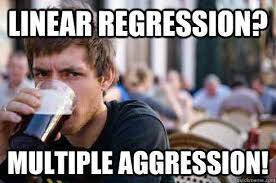

Linear regression is a statistical method that is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

<img src = "https://miro.medium.com/v2/resize:fit:640/1*LEmBCYAttxS6uI6rEyPLMQ.png" width = 400>

In [19]:
LR = LinearRegression()
LR.fit(X_train , y_train)

LinearRegression()

# 6 | Metrics 📈

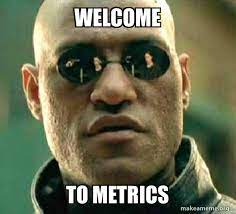

In [20]:
from sklearn.metrics import r2_score

In [21]:
print(LR , r2_score(y_test , LR.predict(X_test)))

LinearRegression() 0.7499970556132298


And that is actually a good score

# 7 | TO DO LIST 📃️ 

```
TO DO 2 : TRAIN SOME NNs

TO DO 3 : ADD WANDB SUPPORT

TO DO 4 : DANCE
```

# 8 | Ending 💹

**THAT IT FOR TODAY GUYS**

**WE WILL GO DEEPER INTO THE DATA IN THE UPCOMING VERSIONS**

**PLEASE COMMENT YOUR THOUGHTS, HIHGLY APPRICIATED**

**DONT FORGET TO MAKE AN UPVOTE, IF YOU LIKED MY WORK  $:)$**

<img src = "https://i.imgflip.com/19aadg.jpg">

**PEACE OUT $!!!$**